In [23]:
import wandb
import numpy as np
from matplotlib import pyplot as plt
from tqdm.notebook import tqdm

api = wandb.Api()

# Get the runs with the tag 'enemy6' and 'enemy7' and 'enemy8' and 'non_uniform' and 'standard'
enemies = ['enemy6', 'enemy7', 'enemy8']
muttypes = ['standard', 'non_uniform']
dataPoolMaxFit = []
dataPoolMeanFit = []
dataPoolStdFit = []
dataPoolMaxGain = []

for enemy in tqdm(enemies):
    for muttype in tqdm(muttypes):
        Maxfitnesses = []
        Meanfitnesses = []
        Stdfitnesses = []
        MaxGains = []
        runs = api.runs(
            "wouterbesse/Evoman Project 1",
            {"$and": [ {"tags": enemy}, {"state": "finished"}, {"config.muttype": muttype} ]},
        )
        for run in tqdm(runs):
            try:
                Maxfitnesses.append(run.history()["Fitness/Best"])
                Meanfitnesses.append(run.history()["Fitness/Mean"])
                Stdfitnesses.append(run.history()["Fitness/Std"])
                MaxGains.append(run.history()["Gain/Best"])
            except:
                # print(run.name, run.config)
                pass
        dataPoolMaxFit.append(np.array(Maxfitnesses))
        dataPoolMeanFit.append(np.array(Meanfitnesses))
        dataPoolStdFit.append(np.array(Stdfitnesses))
        dataPoolMaxGain.append(np.array(MaxGains))

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

## Create charts of the fitness over the generations
This chart wasn't used in the end

(2, 499)
(2, 499)
(2, 499)
(2, 499)
(2, 499)
(2, 499)


C:\Users\woute\AppData\Local\Temp\ipykernel_70980\2658138947.py:70: UserWarning: Glyph 124 (|) missing from font(s) Graphik Trial.
  fig.savefig(f"plots/plots.pdf", format="pdf", bbox_inches="tight")
c:\ProgramData\anaconda3\envs\CUT\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 124 (|) missing from font(s) Graphik Trial.
  fig.canvas.print_figure(bytes_io, **kw)


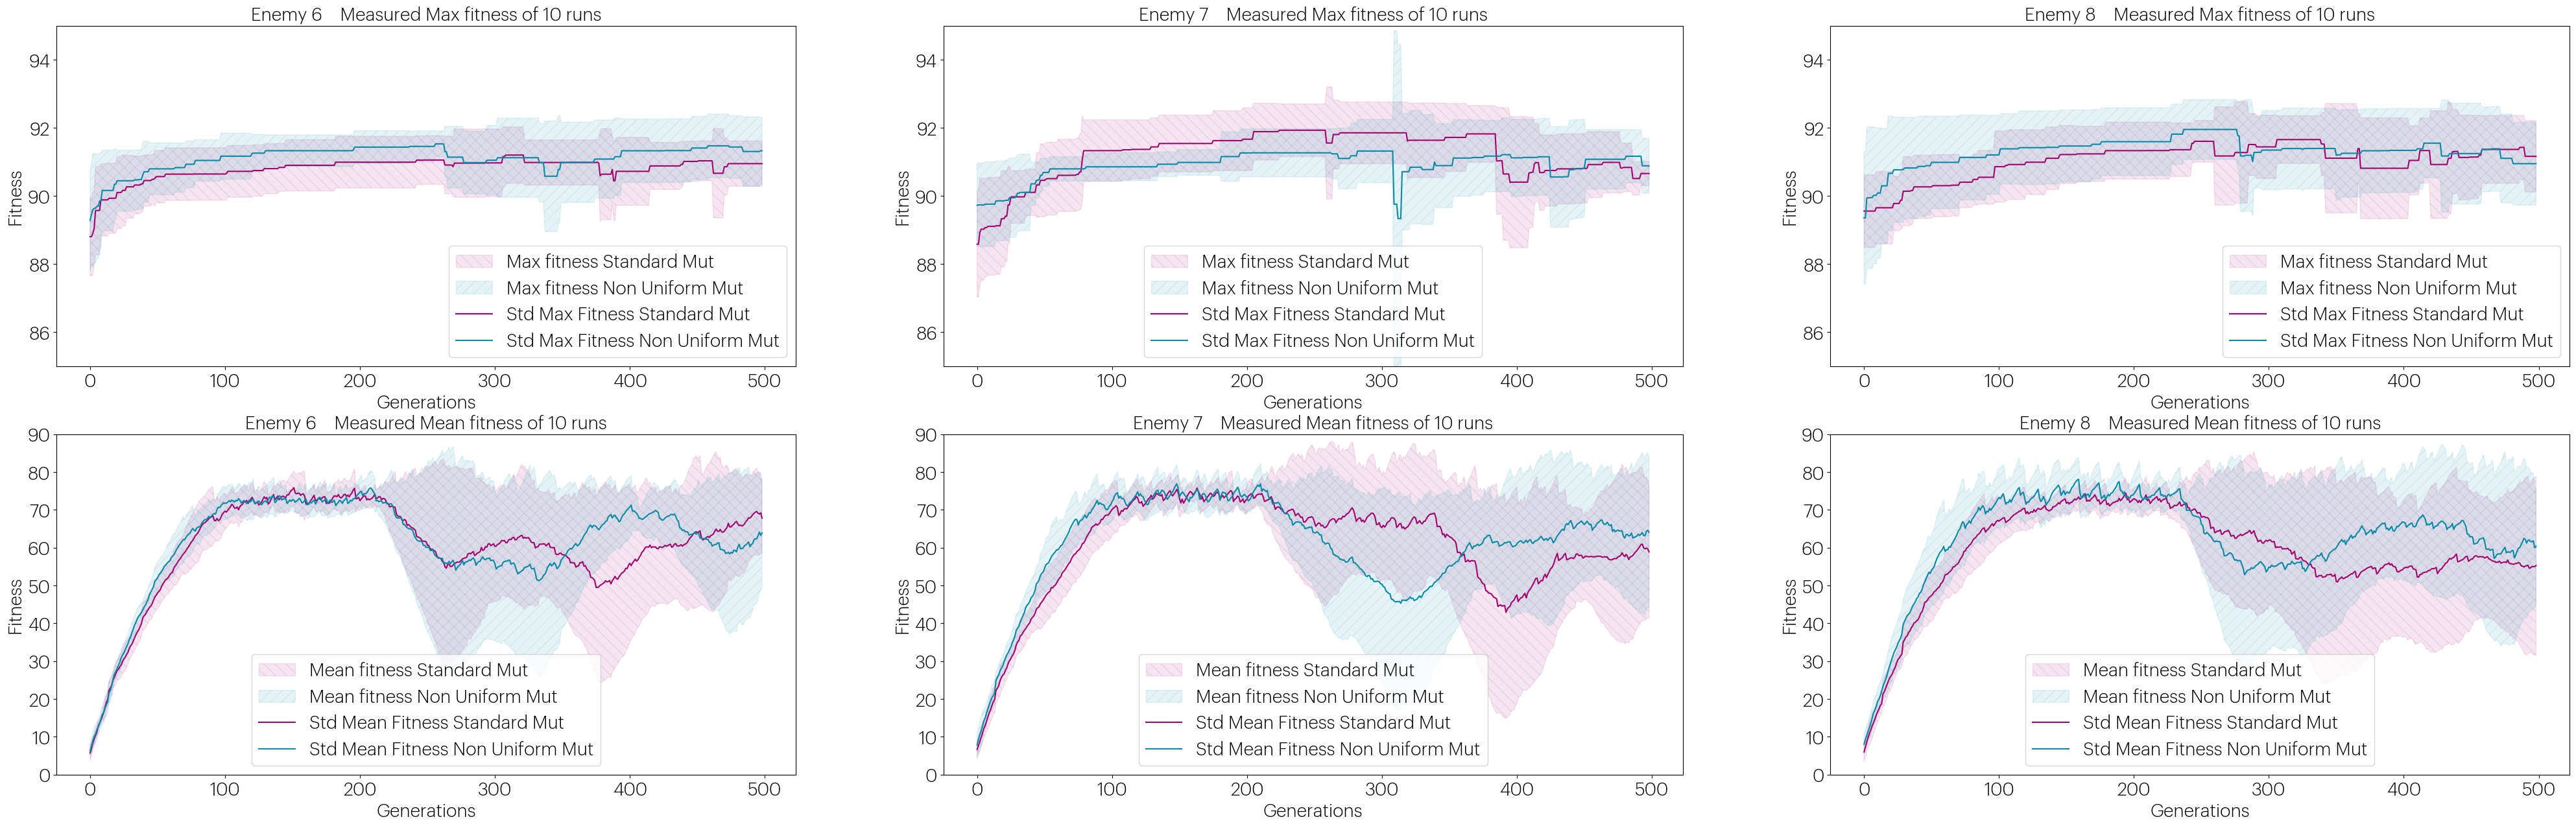

In [19]:
import os
from pathlib import Path
import matplotlib as mpl
from matplotlib.font_manager import FontProperties

# Get the maximum and minimum value of all runs
max_values = float('-inf')
min_values = float('inf')

for i, enemy in enumerate(enemies):
    for j, muttype in enumerate(muttypes):
        npfitnesses = dataPoolMaxFit[i*2+j]
        max_values = max(max_values, np.max(npfitnesses))
        min_values = min(min_values, np.min(npfitnesses))
        npfitnesses = dataPoolMeanFit[i*2+j]
        max_values = max(max_values, np.max(npfitnesses))
        min_values = min(min_values, np.min(npfitnesses))

# Graphs
# colors = ['#A4036F', '#FB23B3', '#048BA8', '#38D6FA', '#12BA7C', '#6AF0BF']
colors = ['#A4036F', '#048BA8']

fig, ax = plt.subplots(2, 3, figsize=(50, 15))
dataPool = [dataPoolMaxFit, dataPoolMeanFit]
types = ["Max", "Mean"]
limits = [(85, 95), (0, 90)]

fpath = Path("C:\\Users\\woute\\Downloads\\graphic\\Graphik-Light-Trial.otf")
font_prop = FontProperties(fname=fpath)

for j in range(2):
    for i, enemy in enumerate(enemies):
        # for j, muttype in enumerate(muttypes):
        maxfitnesses_stan = dataPool[j][i*2]
        maxfitnesses_nonun = dataPool[j][i*2+1]
        meanmaxfitness_stan = np.mean(maxfitnesses_stan, axis=0)
        meanmaxfitness_nonun = np.mean(maxfitnesses_nonun, axis=0)
        meanfitness = [meanmaxfitness_stan, meanmaxfitness_nonun]
        meanstdfitness = np.std([maxfitnesses_stan, maxfitnesses_nonun], axis=1)
        
        # Plot the mean and standard deviation of the fitnesses
        print(meanstdfitness.shape)
        
        ax[j, i].fill_between(range(meanstdfitness.shape[-1]), meanfitness[0]-meanstdfitness[0], meanfitness[0]+meanstdfitness[0], alpha=0.1, color=colors[0], interpolate= True, hatch='\\\\')
        ax[j, i].fill_between(range(meanstdfitness.shape[-1]), meanfitness[1]-meanstdfitness[1], meanfitness[1]+meanstdfitness[1], alpha=0.1, color=colors[1], interpolate= True, hatch='//')
        ax[j, i].plot(meanfitness[0], color=colors[0])
        ax[j, i].plot(meanfitness[1], color=colors[1])
        ax[j, i].set_title(f"Enemy {i + 6} | Measured {types[j]} fitness of 10 runs", font=font_prop)
        ax[j, i].set_xlabel("Generations", font=font_prop)
        ax[j, i].set_ylabel("Fitness", font=font_prop)
        legend = ax[j, i].legend([f"{types[j]} fitness Standard Mut", f"{types[j]} fitness Non Uniform Mut", f"Std {types[j]} Fitness Standard Mut", f"Std {types[j]} Fitness Non Uniform Mut"])
        # set legend font
        for text in legend.get_texts():
            text.set_font_properties(font_prop)
        ax[j, i].set_ylim(limits[j])

        # Set axis font
        for label in (ax[j, i].get_xticklabels() + ax[j, i].get_yticklabels()):
            label.set_fontproperties(font_prop)
        # set width
        
        # Save the plot
        # make the dir if it doesnt exist

        if not os.path.exists("plots"):
            os.makedirs("plots")

plt.rcParams.update({'font.size': 20})
# plt.gcf().set_size_inches(50, 10)
fig.savefig(f"plots/plots.pdf", format="pdf", bbox_inches="tight")
plt.show()

# Set width of figure, and fontsize

## Create boxplots of the best gain and do a t-test

In [49]:
from scipy.stats import ttest_rel

results = []
standard_results = []
non_uniform_results = []

for i, enemy in enumerate(enemies):
    enlist_stan = []
    enlist_nonu = []
    for j, muttype in enumerate(muttypes):
        npfitnesses = dataPoolMaxFit[i*2+j]
        for run in npfitnesses:
            max_fitness = np.max(run)
            if j == 0:
                enlist_stan.append(max_fitness)
                standard_results.append(max_fitness)
                # results.append(max_fitness)
                # print(max_fitness)
            else:
                enlist_nonu.append(max_fitness)
                non_uniform_results.append(max_fitness)
                # results.append(max_fitness)
                # print(max_fitness)
    results.append(enlist_stan)
    results.append(enlist_nonu)

    print(results)

[[90.41642023266135, 90.8014067855038, 92.75092827018351, 91.52234767677737, 91.73070308686624, 92.49616819497442, 91.32322890233345, 90.85968822339261, 90.77302464366022, 90.85968822339261], [91.89289246928256, 91.27968822339261, 91.79185751001958, 91.65275134159977, 91.47616819497442, 91.94628484395722, 91.67959913428288, 91.35193985886491, 90.95642023266134, 93.52506424239103]]
[[90.41642023266135, 90.8014067855038, 92.75092827018351, 91.52234767677737, 91.73070308686624, 92.49616819497442, 91.32322890233345, 90.85968822339261, 90.77302464366022, 90.85968822339261], [91.89289246928256, 91.27968822339261, 91.79185751001958, 91.65275134159977, 91.47616819497442, 91.94628484395722, 91.67959913428288, 91.35193985886491, 90.95642023266134, 93.52506424239103], [90.88964054567597, 91.05616819497443, 91.9730739740296, 92.53669509194094, 91.01237888630939, 92.71669509194095, 91.80693855665947, 93.26951600496186, 92.47669509194094, 91.63968822339261], [90.30492807779761, 91.02324619773175, 90

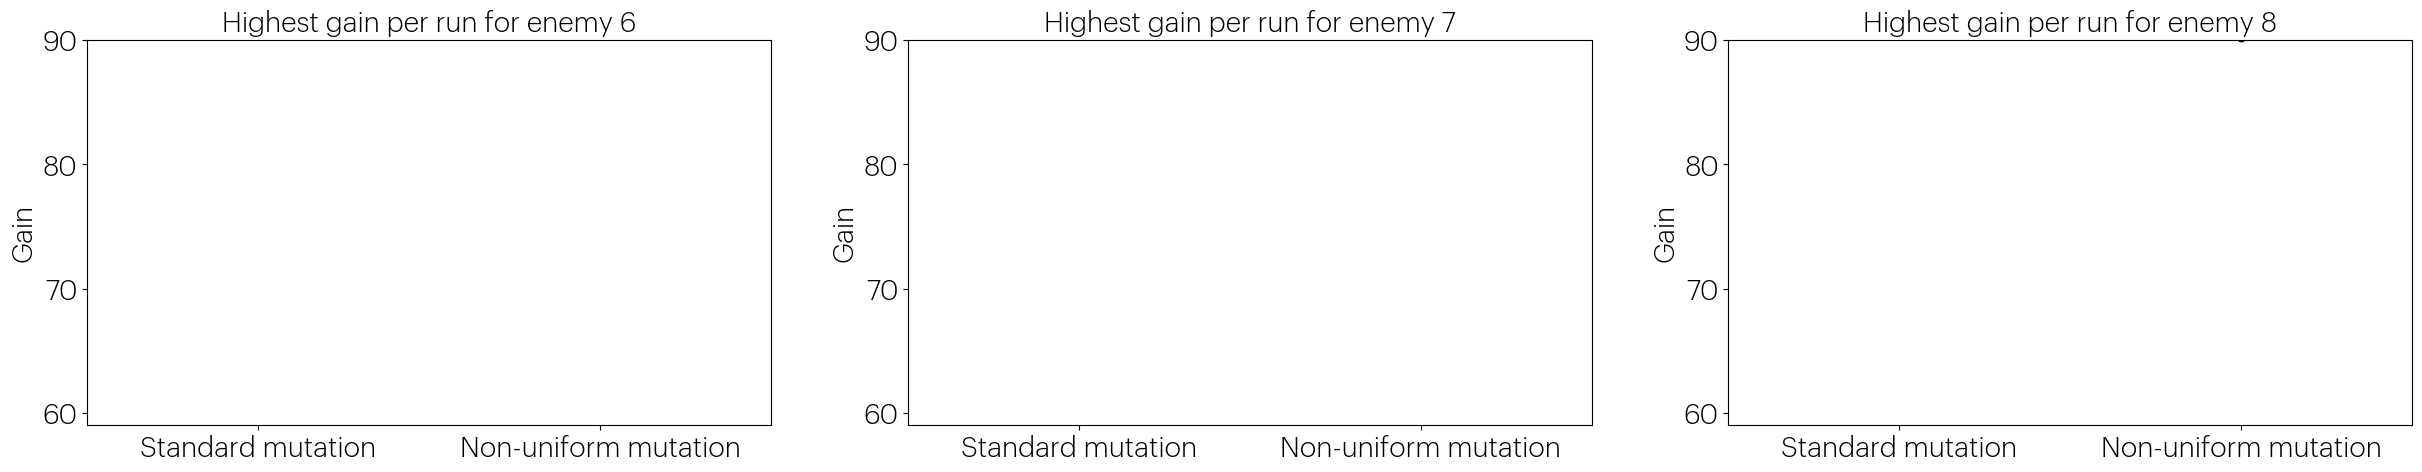

In [50]:
colors = ['#A4036F33', '#FB23B333', '#048BA833', '#38D6FA33', '#12BA7C33', '#6AF0BF33']

fig, ax = plt.subplots(1, 3, figsize=(30, 5))
for i, enemy in enumerate(enemies):
    # Make a bolxplot for each enemy
    bp = ax[i].boxplot(results[i*2:i*2+2], patch_artist=True, )

    # Set color of boxes
    for j, patch in enumerate(bp['boxes']):
        patch.set_facecolor(colors[i*2+j])
    
    # set mean line color
    for median in bp['medians']:
        median.set(color='black', linewidth=2)
    
    # Set names
    ax[i].set_xticks([1, 2], [f'Standard mutation', f'Non-uniform mutation'], font=font_prop)
    ax[i].set_ylabel("Gain", font=font_prop)
    ax[i].set_ylim([59, 90])
    ax[i].set_title("Highest gain per run for enemy " + str(i + 6), font=font_prop)

    # set axis font
    for label in (ax[i].get_xticklabels() + ax[i].get_yticklabels()):
        label.set_fontproperties(font_prop)
        
plt.rcParams.update({'font.size': 20})
plt.savefig("plots/boxplots.pdf", format="pdf", bbox_inches="tight")
plt.show()


In [55]:
for i, enemy in enumerate(enemies):
    print(f"Enemy {i+6}:")
    t_stat, p_value = ttest_rel(results[i*2], results[i*2+1])

    print("T-test results:")
    print(t_stat, p_value)
    print("Max standard:", np.mean(results[i*2]))
    print("Max non-uniform:", np.mean(results[i*2+1]))
    print()

Enemy 6:
T-test results:
-1.2302870088195368 0.24977594210906515
Max standard: 91.35336042397455
Max non-uniform: 91.75526660514264

Enemy 7:
T-test results:
1.962652894339832 0.08129698251839958
Max standard: 91.93774896618261
Max non-uniform: 91.58355785193537

Enemy 8:
T-test results:
-0.47122668087912656 0.6486920079310992
Max standard: 91.89875878539067
Max non-uniform: 92.10496153049233

